# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$:
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [42]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm
from sklearn.inspection import DecisionBoundaryDisplay

def iter_assignments(n):
    for n_positives in range(1, n):
        for positives_idices in combinations(range(n), n_positives):
            y = np.zeros(n, dtype='uint8')
            y[list(positives_idices)] = 1
            yield y

def is_splits(S, y):
    svm = sklearn.svm.SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
    svm.fit(S, y)
    return svm, (svm.predict(S) == y).all()

# S is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(S):
    for y in iter_assignments(S.shape[0]):
        if not is_splits(S, y)[1]:
            return False
    return True

### c)

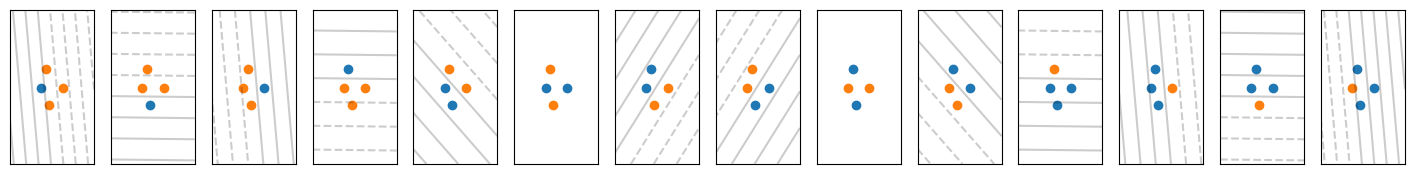

In [ ]:
svm = sklearn.svm.SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
d = 2
n = 4
S = np.random.random(n*d).reshape(n, d)

Ys = [y for y in iter_assignments(n)]
fig, axs = plt.subplots(1, len(Ys), figsize=(18, 2))
for i, y in enumerate(Ys):
    svm, splittable = is_splits(S, y)
    # svm.decision_function([[S[:,0].min(), S[:,1].min()]])
    axs[i].scatter(S[y == 1][:,0], S[y == 1][:,1], color='C0')
    axs[i].scatter(S[y == 0][:,0], S[y == 0][:,1], color='C1')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    DecisionBoundaryDisplay.from_estimator(
        svm,
        S,
        plot_method="contour",
        colors="k",
        # levels=[-1, 0, 1],
        alpha=0.2 if splittable else 0,
        # linestyles=["--", "-", "--"],
        ax=axs[i],
    )
plt.show()

### d)

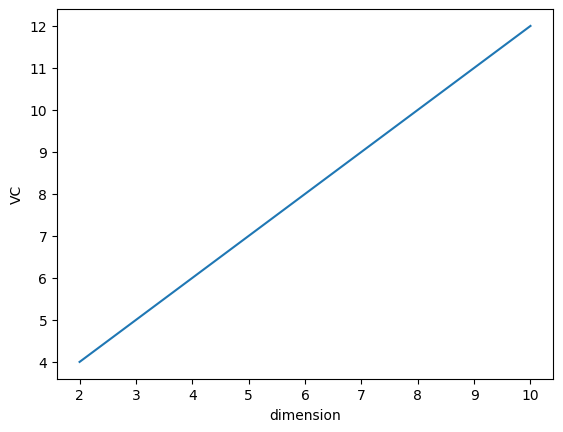

In [45]:
estimate = {}
for d in range(2,11):
    for n in list(range(2,20)):
        shattered = False
        for _ in range(50):
            S = np.random.multivariate_normal(
                mean=np.zeros(d),
                cov=np.eye(d),
                size=n
            )
            shattered = is_shattered(S)
            if shattered:
                break
        if not shattered:
            estimate[d] = n
            break

ds = sorted(list(estimate.keys()))
plt.plot(ds, [estimate[d] for d in ds])
plt.xlabel('dimension')
plt.ylabel('VC')
plt.show()